In [19]:
import os ,keras,pandas
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
#from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Read Data

In [26]:
flower='D:\\flower\\flowerdataset'
test,train=os.listdir(flower)
train_data=[i for i in os.listdir(os.path.join(flower,train))]
train_data

['Daisy',
 'Dandelion',
 'Lavender',
 'Lilly',
 'Lotus',
 'Orchid',
 'Rose',
 'Sunflower',
 'Tulip']

In [4]:
test_classes=[i for i in os.listdir(os.path.join(flower,test))]

In [69]:
train_dataf=[]
labels=[]
for index,i in enumerate(train_data):
    for img in os.listdir(os.path.join(flower,train,i)):
        path=os.path.join(flower,train,i,img)
        train_dataf.append(path)
        labels.append(index)
        

In [71]:
test_data=[]
test_label=[]
for idx,i in enumerate(train_data):
    for img in os.listdir(os.path.join(flower,test,i)):
        path=os.path.join(flower,test,i,img)
        test_data.append(path)
        test_label.append(idx)


### Visualize sample of data

In [ ]:
import random


In [ ]:
fig,axes=plt.subplots(3,3,figsize=(10,10))
for idx,i in enumerate(os.listdir(os.path.join(flower,train))):
        j=random.randint(1,50)
        x=os.listdir(os.path.join(flower,train,i))
        im=os.path.join(flower,train,i,x[j])
        ax=axes[idx//3,idx%3]
        ax.imshow(cv2.imread(im))
        ax.set_title(i)
        ax.axis("off")
plt.tight_layout()
plt.show()

### split data

In [ ]:
import numpy as np

In [ ]:
#final_data=train_dataf

In [ ]:
#final_data=np.array(train_dataf)

In [9]:
#final_data=final_data/255

In [10]:
#final_data.shape

(3600, 224, 224, 3)

In [11]:
#len(labels)

3600

In [12]:
#labels=np.array(labels)


In [29]:
from sklearn.model_selection import train_test_split
xtrain,val_train,xtst,val_tst=train_test_split(train_dataf,labels,test_size=0.3,random_state=42)

### Training model

In [54]:
# Create the base model
Model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='avg')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Build a sequential model on top of the pre-trained base model
model = keras.Sequential([
    Model,
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(len(train_data), activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten_6 (Flatten)         (None, 1280)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 9)                 4617      
                                                                 
Total params: 4,710,060
Trainable params: 660,489
Non-trainable params: 4,049,571
_________________________________________________________________


In [43]:
# model=keras.Sequential()
# model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(keras.layers.MaxPooling2D(2, 2))

# model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(2, 2))

# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(10, activation='relu'))
# model.add(keras.layers.Dense(9, activation='softmax'))

# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 46656)             0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [55]:
x_type=list(map(str,xtst))
val_type=list(map(str,val_tst))

### training model

In [60]:
datagen=ImageDataGenerator(
    
    rotation_range=10,
    width_shift_range=0.3,
    height_shift_range=0.3,
    #fill_mode='nearset',
    horizontal_flip=True,
    shear_range=0.3,
    zoom_range=0.3
)

traingen=datagen.flow_from_dataframe(
    dataframe=pandas.DataFrame({'img':xtrain,'type':x_type}),
    x_col='img'
    ,y_col='type',
    target_size=(224,224),
    class_mode='sparse',
    shuffle=False,
    batch_size=64,
)
valgen=datagen.flow_from_dataframe(
    dataframe=pandas.DataFrame({'img':val_train,'type':val_type}),
     x_col='img'
    ,y_col='type',
    target_size=(224,224),
    class_mode='sparse',
    shuffle=False,
    batch_size=64,
)

Found 2520 validated image filenames belonging to 9 classes.
Found 1080 validated image filenames belonging to 9 classes.


In [61]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [62]:
model.fit(traingen,verbose=1,
    epochs=12,validation_data=valgen)

Epoch 1/12
40/40 [==============================] - 80s 2s/step - loss: 1.0138 - accuracy: 0.6687 - val_loss: 0.5897 - val_accuracy: 0.8167
Epoch 2/12
40/40 [==============================] - 74s 2s/step - loss: 0.4839 - accuracy: 0.8381 - val_loss: 0.5093 - val_accuracy: 0.8315
Epoch 3/12
40/40 [==============================] - 75s 2s/step - loss: 0.3872 - accuracy: 0.8742 - val_loss: 0.4659 - val_accuracy: 0.8500
Epoch 4/12
40/40 [==============================] - 75s 2s/step - loss: 0.3198 - accuracy: 0.8952 - val_loss: 0.4053 - val_accuracy: 0.8602
Epoch 5/12
40/40 [==============================] - 74s 2s/step - loss: 0.2726 - accuracy: 0.9087 - val_loss: 0.4099 - val_accuracy: 0.8676
Epoch 6/12
40/40 [==============================] - 75s 2s/step - loss: 0.2625 - accuracy: 0.9103 - val_loss: 0.4253 - val_accuracy: 0.8593
Epoch 7/12
40/40 [==============================] - 75s 2s/step - loss: 0.2298 - accuracy: 0.9234 - val_loss: 0.4573 - val_accuracy: 0.8500
Epoch 8/12
40/40 [==

In [72]:
label=list(map(str,test_label))

testgen=datagen.flow_from_dataframe(
    dataframe=pandas.DataFrame({'img':test_data,'type':label}),
    x_col='img'
    ,y_col='type',
    target_size=(224,224),
    class_mode='sparse',
    shuffle=False,
    batch_size=64,
)

Found 881 validated image filenames belonging to 9 classes.


In [73]:
y_pred=model.predict(testgen)

14/14 [==============================] - 23s 1s/step


In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
import numpy as np
yf_pred=[]
for i in y_pred:
    yf_pred.append(np.argmax(i))

In [79]:
conf_metrix=confusion_matrix(yf_pred,test_label)
conf_metrix

array([[79,  3,  1,  2,  1,  0,  0,  0,  0],
       [ 6, 90, 92,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  1,  3,  0,  0,  6,  0,  2],
       [ 0,  0,  0, 73,  4,  1,  2,  0,  6],
       [ 0,  0,  1,  7, 89,  0,  0,  0,  8],
       [ 1,  0,  1,  7,  3, 87,  1,  1, 10],
       [ 0,  0,  0,  2,  2,  1, 86,  0,  6],
       [ 3,  7,  4,  0,  0,  0,  1, 99,  1],
       [ 2,  0,  0,  6,  1,  0,  4,  0, 66]], dtype=int64)

<Axes: >

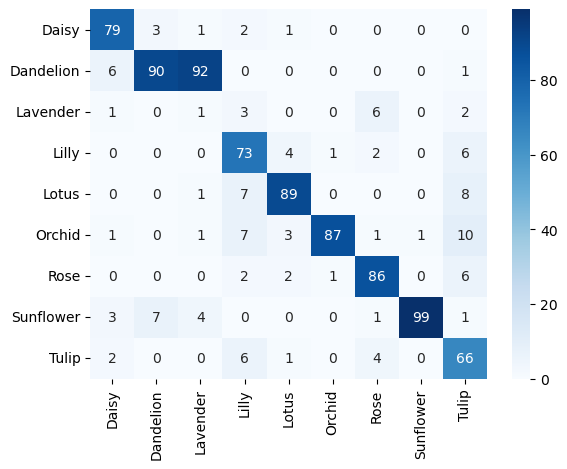

In [80]:
import seaborn as sns
sns.heatmap(conf_metrix,annot=True, xticklabels=train_data, yticklabels=train_data,cmap='Blues')

In [81]:
imgt=os.path.join('D:\\flower\\flowerdataset\\test',test_classes[3],'4e3dd0e535.jpg')
imgt

'D:\\flower\\flowerdataset\\test\\Lilly\\4e3dd0e535.jpg'

In [82]:
imgt=cv2.imread(imgt)
imgt=cv2.resize(imgt,(224,224))
imgt=imgt.reshape(-1,224,224,3)

In [83]:
def classimg(img):
    x=model.predict(img)
    n=np.argmax(x)
    return f'the img from {test_classes[n]} '

In [84]:
classimg(imgt)

1/1 [==============================] - 2s 2s/step


'the img from Lilly '

In [86]:
report = classification_report(yf_pred, test_label, target_names=test_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

       Daisy       0.86      0.92      0.89        86
   Dandelion       0.90      0.48      0.62       189
    Lavender       0.01      0.08      0.02        13
       Lilly       0.73      0.85      0.78        86
       Lotus       0.89      0.85      0.87       105
      Orchid       0.98      0.78      0.87       111
        Rose       0.86      0.89      0.87        97
   Sunflower       0.99      0.86      0.92       115
       Tulip       0.66      0.84      0.74        79

    accuracy                           0.76       881
   macro avg       0.76      0.73      0.73       881
weighted avg       0.86      0.76      0.79       881

